In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import tree

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.shape

(918, 12)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['Sex'].replace(['M', 'F'],
                        [1, 0], inplace=True)

In [ ]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],
                        [3, 2, 1, 0], inplace=True)

In [ ]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df['RestingECG'].replace(['Normal','ST','LVH'],[2, 1, 0], inplace=True)

In [ ]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df['ST_Slope'].replace(['Up', 'Flat', 'Down'],[2, 1, 0], inplace=True)

In [ ]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['ExerciseAngina'].replace(['N', 'Y'],[0, 1], inplace=True)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,2,172,0,0.0,2,0
1,49,0,2,160,180,0,2,156,0,1.0,1,1
2,37,1,3,130,283,0,1,98,0,0.0,2,0
3,48,0,1,138,214,0,2,108,1,1.5,1,1
4,54,1,2,150,195,0,2,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,2,132,0,1.2,1,1
914,68,1,1,144,193,1,2,141,0,3.4,1,1
915,57,1,1,130,131,0,2,115,1,1.2,1,1
916,57,0,3,130,236,0,0,174,0,0.0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


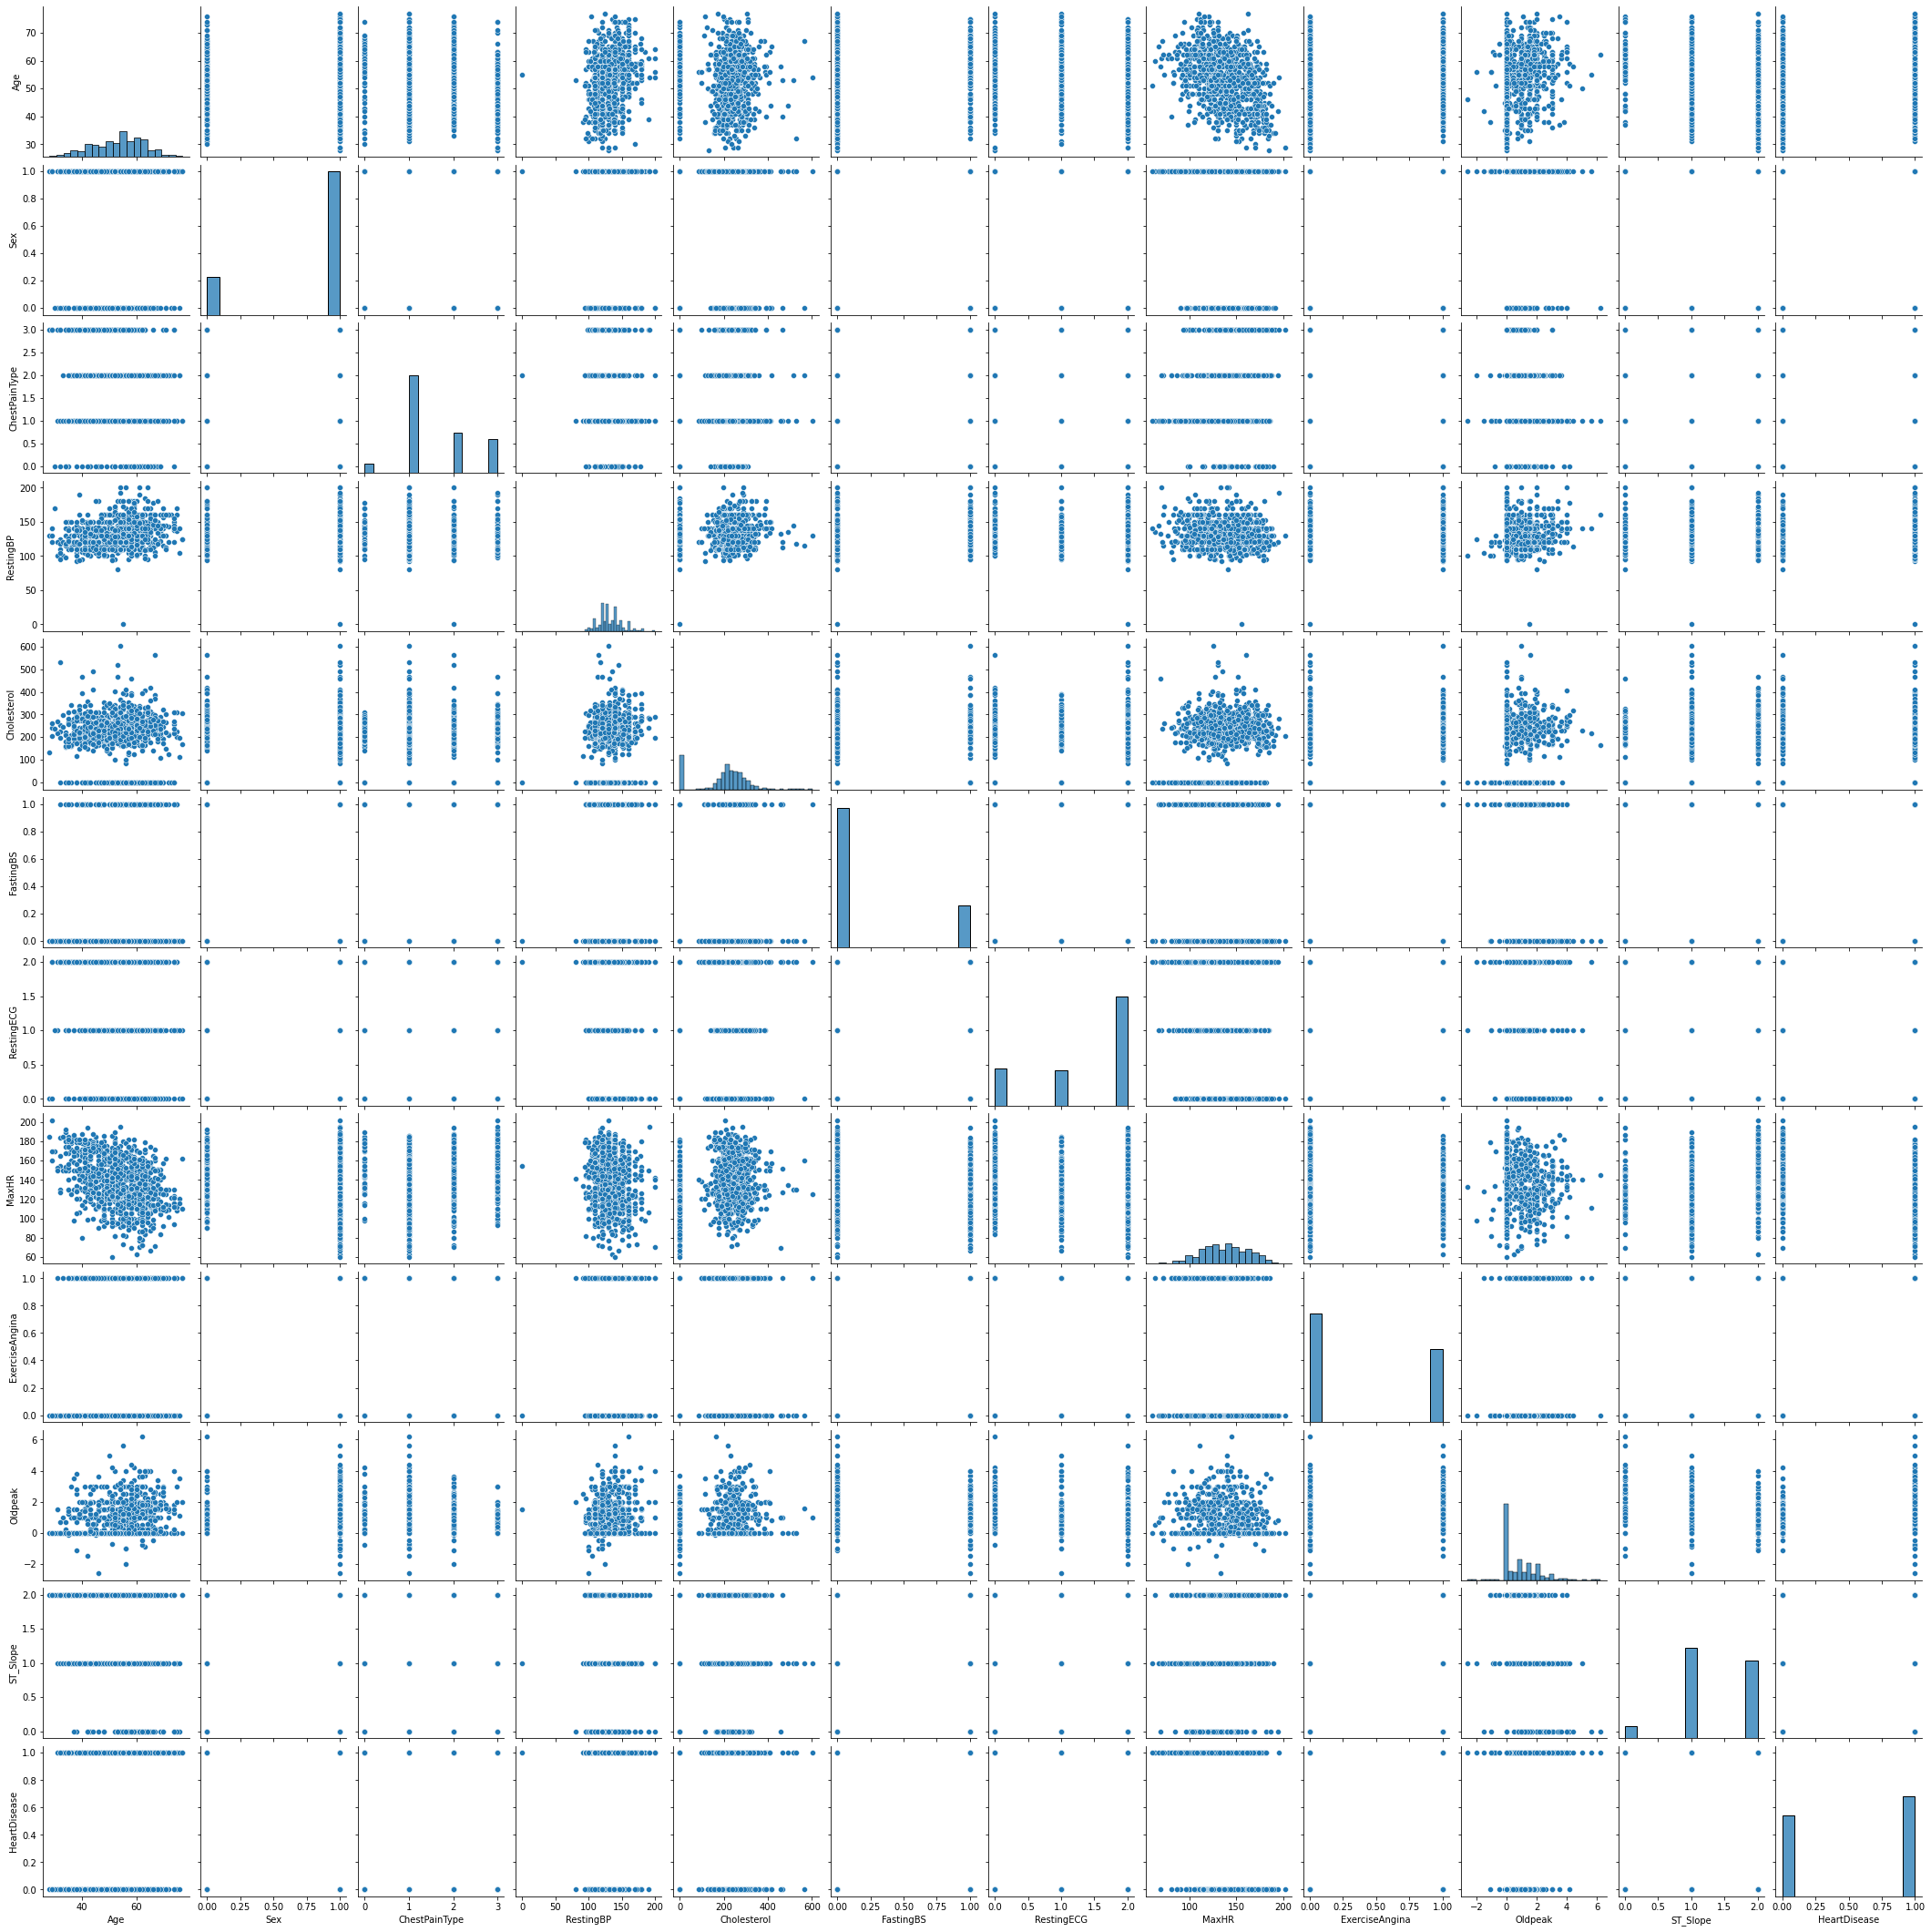

In [ ]:
sns.pairplot(df)
plt.show()

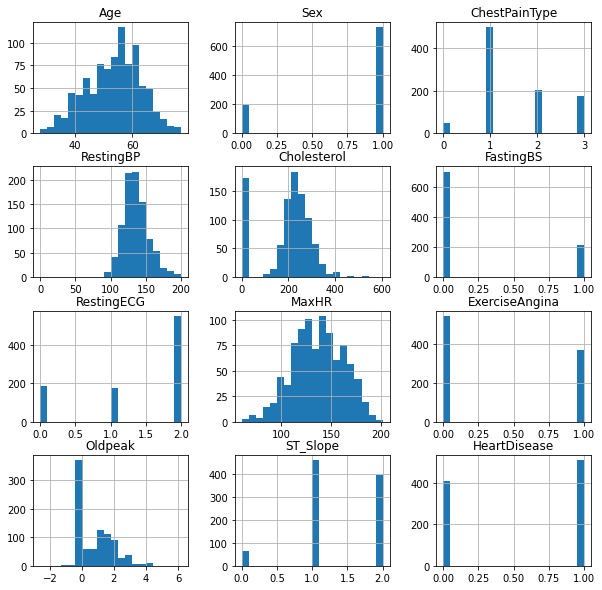

In [ ]:
df.hist(bins=20,figsize=(10,10))
plt.show()

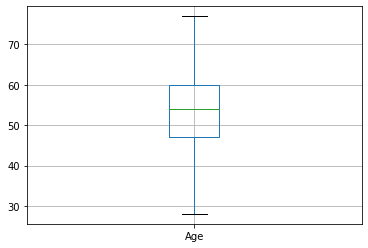

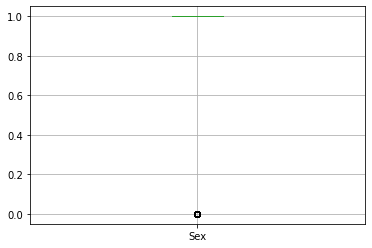

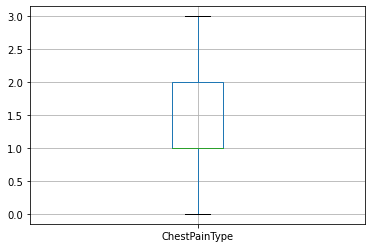

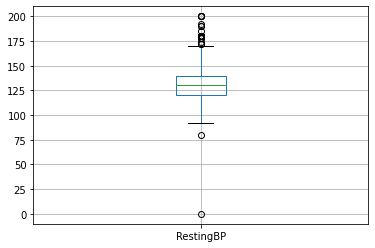

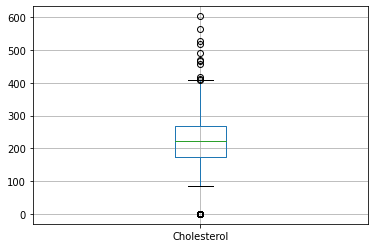

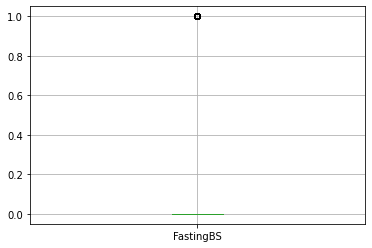

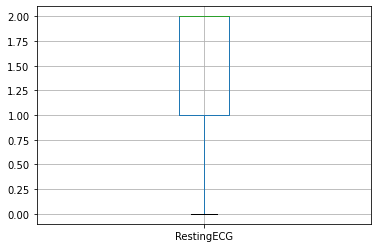

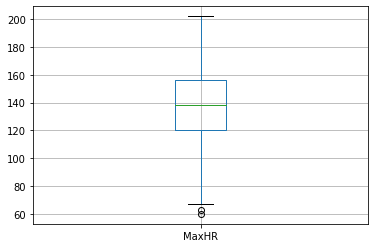

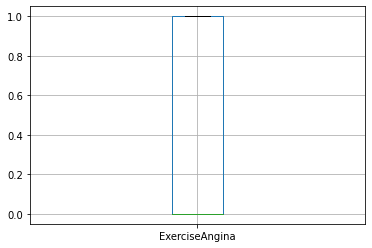

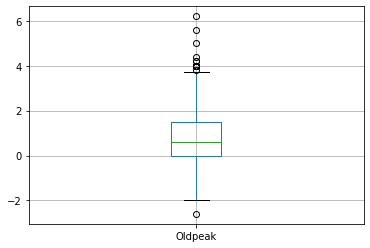

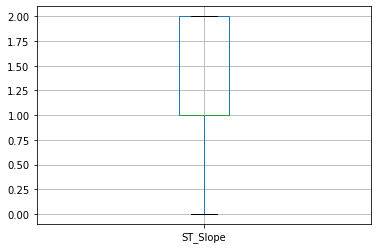

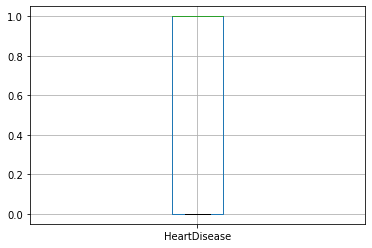

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR

Age               13.00
Sex                0.00
ChestPainType      1.00
RestingBP         20.00
Cholesterol       93.75
FastingBS          0.00
RestingECG         1.00
MaxHR             36.00
ExerciseAngina     1.00
Oldpeak            1.50
ST_Slope           1.00
HeartDisease       1.00
dtype: float64

In [ ]:
df.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.00,0.06,-0.21,0.25,-0.10,0.20,-0.21,-0.38,0.22,0.26,-0.27,0.28
Sex,0.06,1.00,-0.18,0.01,-0.20,0.12,0.02,-0.19,0.19,0.11,-0.15,0.31
ChestPainType,-0.21,-0.18,1.00,-0.08,0.13,-0.16,0.11,0.27,-0.32,-0.30,0.35,-0.46
RestingBP,0.25,0.01,-0.08,1.00,0.10,0.07,-0.10,-0.11,0.16,0.16,-0.08,0.11
Cholesterol,-0.10,-0.20,0.13,0.10,1.00,-0.26,-0.11,0.24,-0.03,0.05,0.11,-0.23
FastingBS,0.20,0.12,-0.16,0.07,-0.26,1.00,-0.05,-0.13,0.06,0.05,-0.18,0.27
RestingECG,-0.21,0.02,0.11,-0.10,-0.11,-0.05,1.00,-0.05,-0.04,-0.11,0.08,-0.06
MaxHR,-0.38,-0.19,0.27,-0.11,0.24,-0.13,-0.05,1.00,-0.37,-0.16,0.34,-0.40
ExerciseAngina,0.22,0.19,-0.32,0.16,-0.03,0.06,-0.04,-0.37,1.00,0.41,-0.43,0.49
Oldpeak,0.26,0.11,-0.30,0.16,0.05,0.05,-0.11,-0.16,0.41,1.00,-0.50,0.40


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#model accuracy
lin_reg.score(x_test, y_test)

0.48262287512501245

In [ ]:
#predict
lin_reg.predict([[49,0,2,160,180,0,2,156,0,1.0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.33536292])

In [ ]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [ ]:
#model accuracy
dtree.score(x_test, y_test)

0.7913043478260869

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_10 <= 1.50
|   |--- feature_2 <= 1.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_3 <= 147.50
|   |   |   |   |--- feature_3 <= 115.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  115.00
|   |   |   |   |   |--- feature_4 <= 301.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  301.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  147.50
|   |   |   |   |--- feature_7 <= 157.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  157.00
|   |   |   |   |   |--- feature_6 <= 1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  1.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_9 <= 1.05
|   |   |   |   |   |--- feature_3 <= 140.00
|   |   |   |   |   |   |--- feature_7 <= 133.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  1

[Text(0.5470302519517388, 0.9705882352941176, 'X[10] <= 1.5\ngini = 0.496\nsamples = 688\nvalue = [312, 376]'),
 Text(0.3076871894960965, 0.9117647058823529, 'X[2] <= 1.5\ngini = 0.302\nsamples = 399\nvalue = [74, 325]'),
 Text(0.13205287437899219, 0.8529411764705882, 'X[2] <= 0.5\ngini = 0.199\nsamples = 295\nvalue = [33, 262]'),
 Text(0.0454222853087296, 0.7941176470588235, 'X[3] <= 147.5\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.0227111426543648, 0.7352941176470589, 'X[3] <= 115.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.0113555713271824, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.034066713981547196, 0.6764705882352942, 'X[4] <= 301.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.0227111426543648, 0.6176470588235294, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.0454222853087296, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06813342796309439, 0.7352941176470589, 'X[7] <= 157.0\ngin

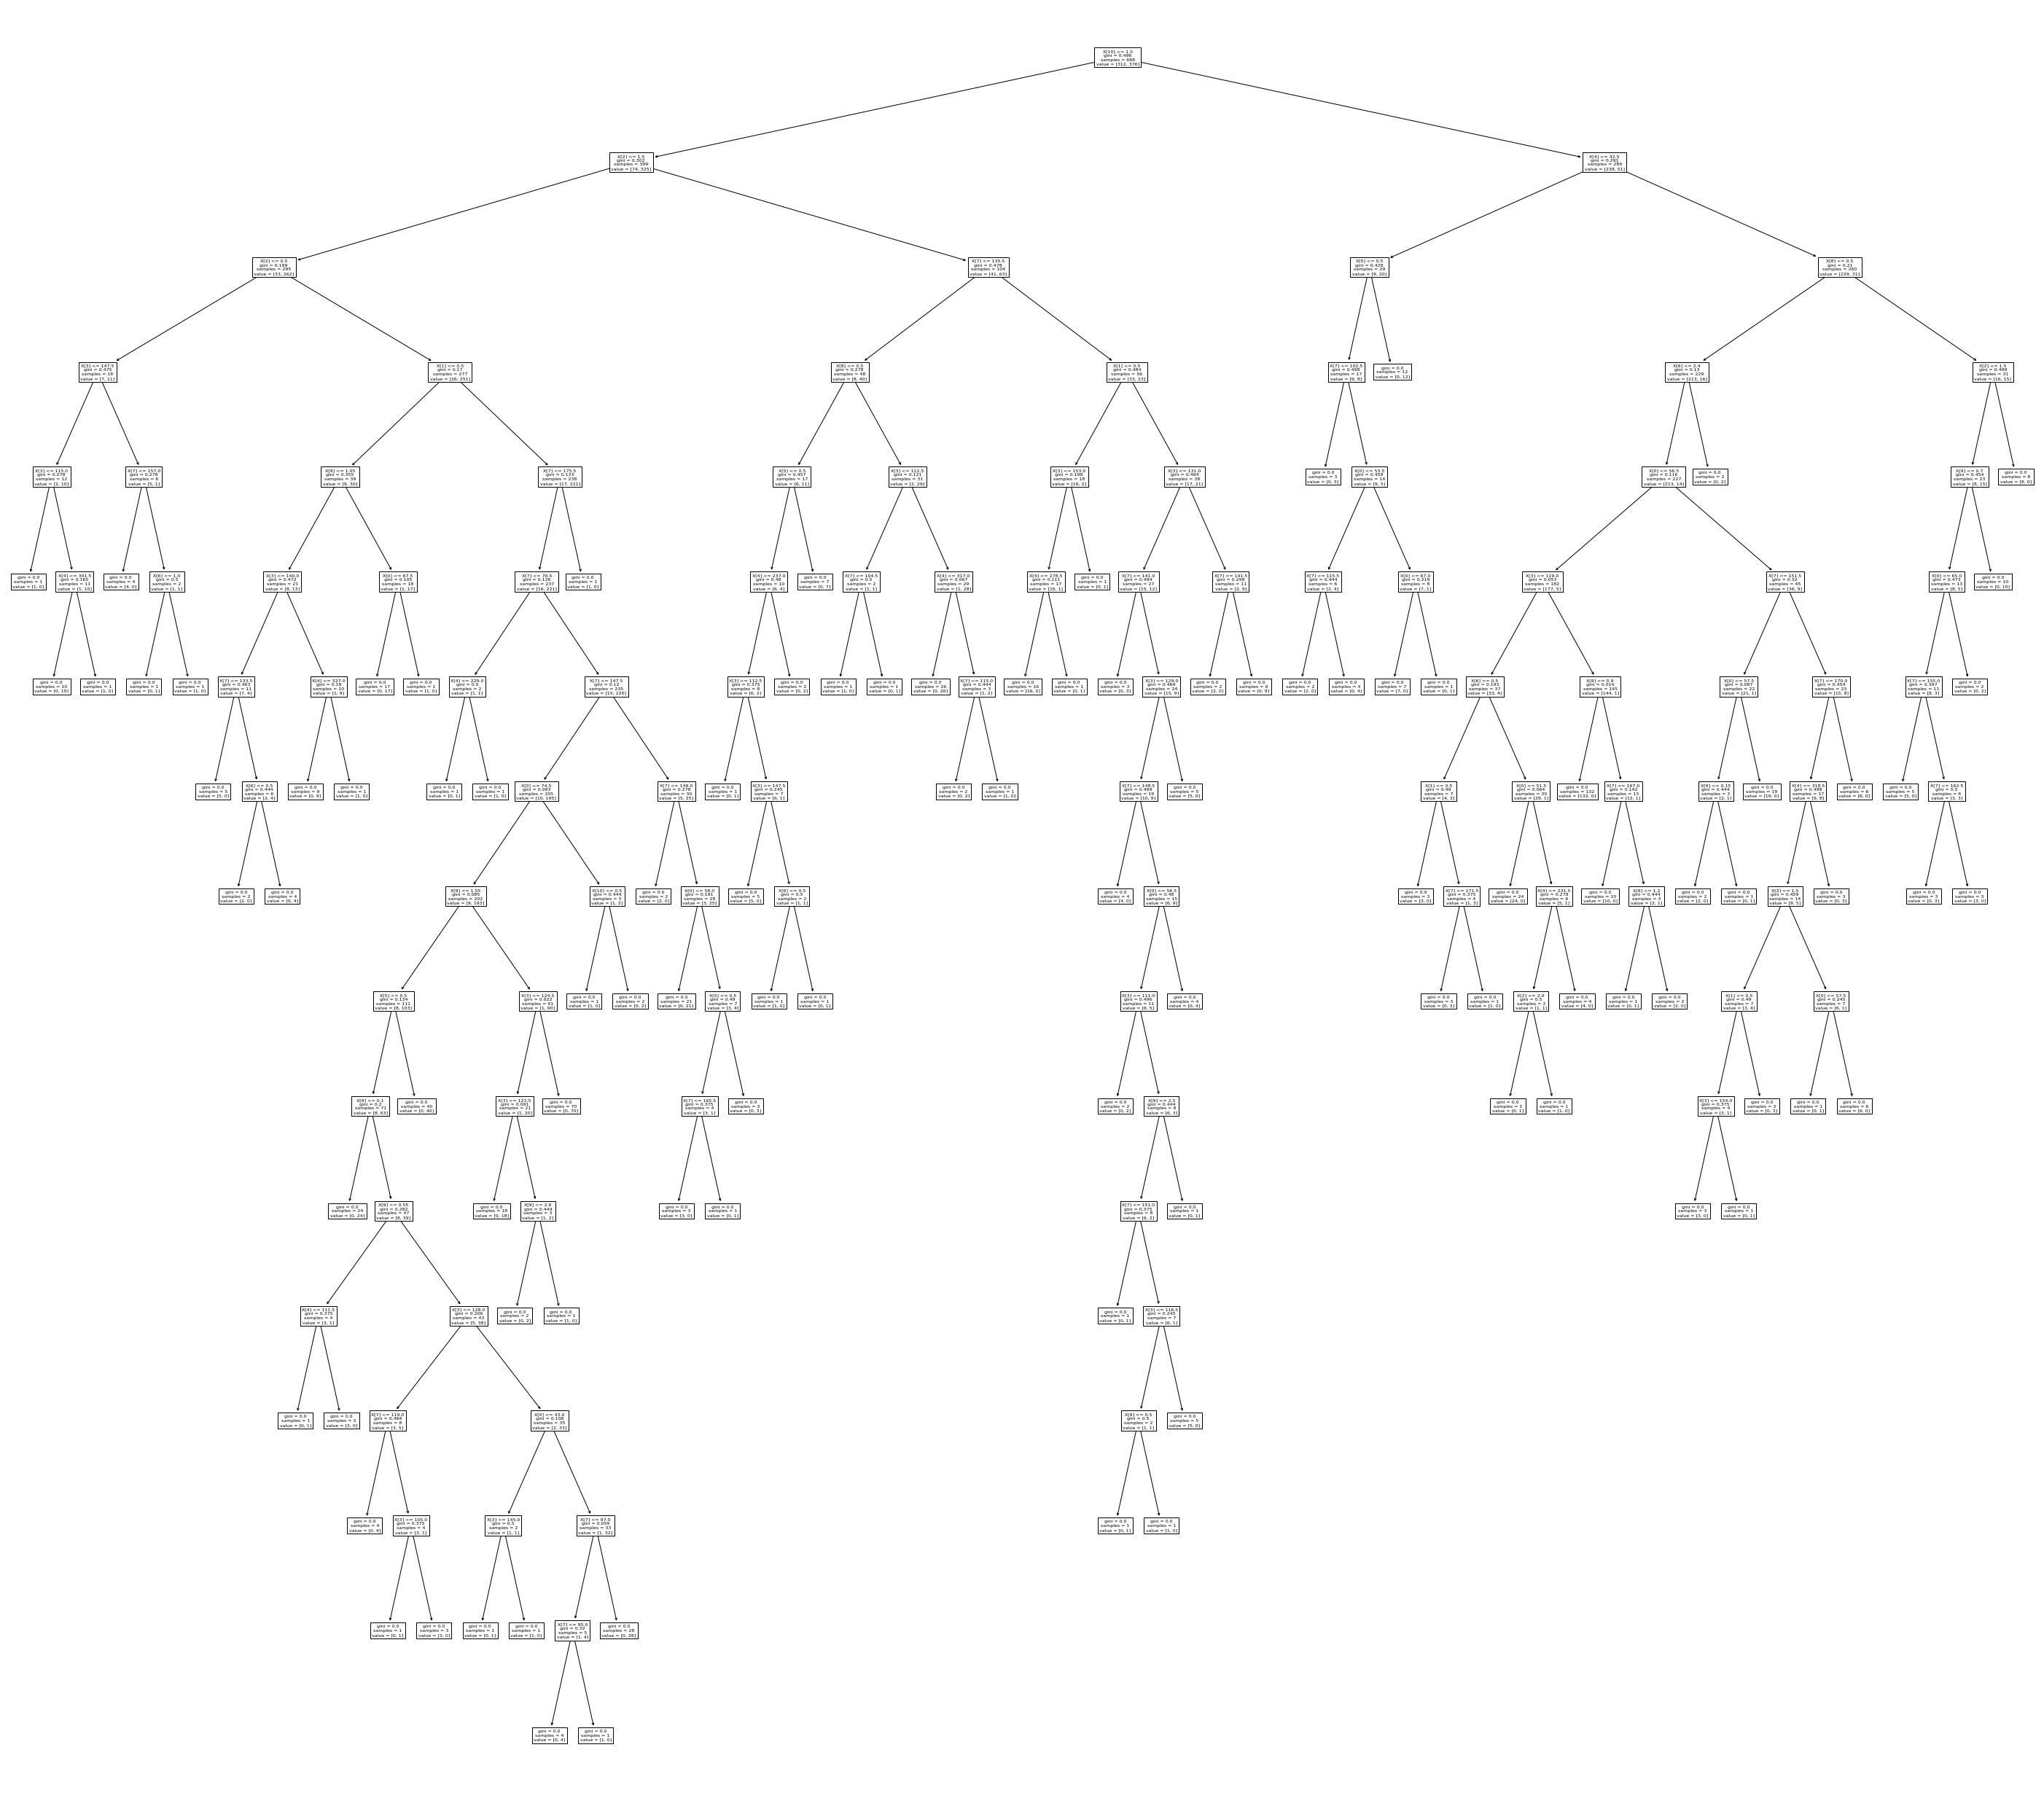

In [ ]:
plt.figure(figsize=(50,45))
tree.plot_tree(dtree, impurity=True)

In [ ]:
#predict
dtree.predict([[54,1,2,150,195,0,2,122,0,0.0,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [ ]:
rf.score(x_test, y_test)

0.8869565217391304

In [ ]:
#predict
rf.predict([[54,1,2,150,195,0,2,122,0,0.0,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])